#### Data Understanding

Context
An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products
The data contains the following information:

ID: ID Number of Customers.
Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
Cost of the product: Cost of the Product in US Dollars.
Prior purchases: The Number of Prior Purchase.
Product importance: The company has categorized the product in the various parameter such as low, medium, high.
Gender: Male and Female.
Discount offered: Discount offered on that specific product.
Weight in gms: It is the weight in grams.
Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

This data of Product Shipment Tracking, answer instantly to your questions:

What was Customer Rating? And was the product delivered on time?
Is Customer query is being answered?
If Product importance is high. having higest rating or being delivered on time?

#### Import Libraries 

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, roc_curve, classification_report, confusion_matrix

## 1.EDA

In [29]:
df = pd.read_csv("Train.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [30]:
#Checking our data shape
df.shape

(10999, 12)

In [31]:
#Data types
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [33]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [34]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


#### Data Visualization

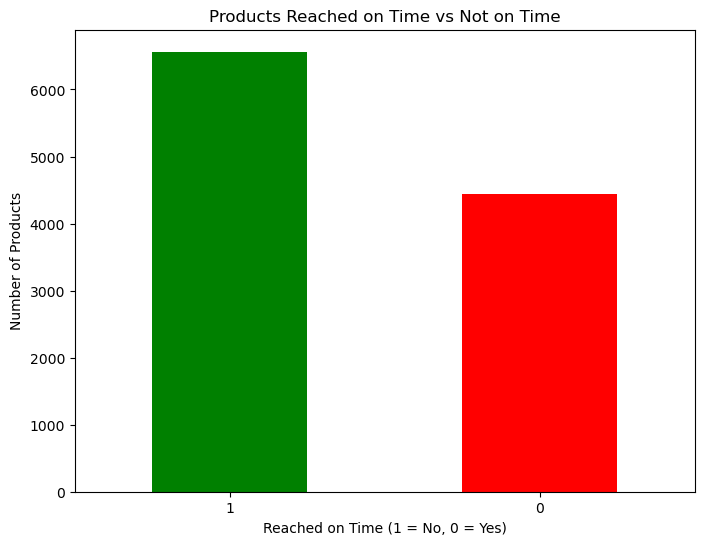

In [35]:
on_time_counts = df['Reached.on.Time_Y.N'].value_counts()

plt.figure(figsize=(8, 6))
on_time_counts.plot(kind='bar', color=['green', 'red'])
plt.title("Products Reached on Time vs Not on Time")
plt.xlabel("Reached on Time (1 = No, 0 = Yes)")
plt.ylabel("Number of Products")
plt.xticks(rotation=0)
plt.show()

# From our plot we can see that most products didnt reach on time 

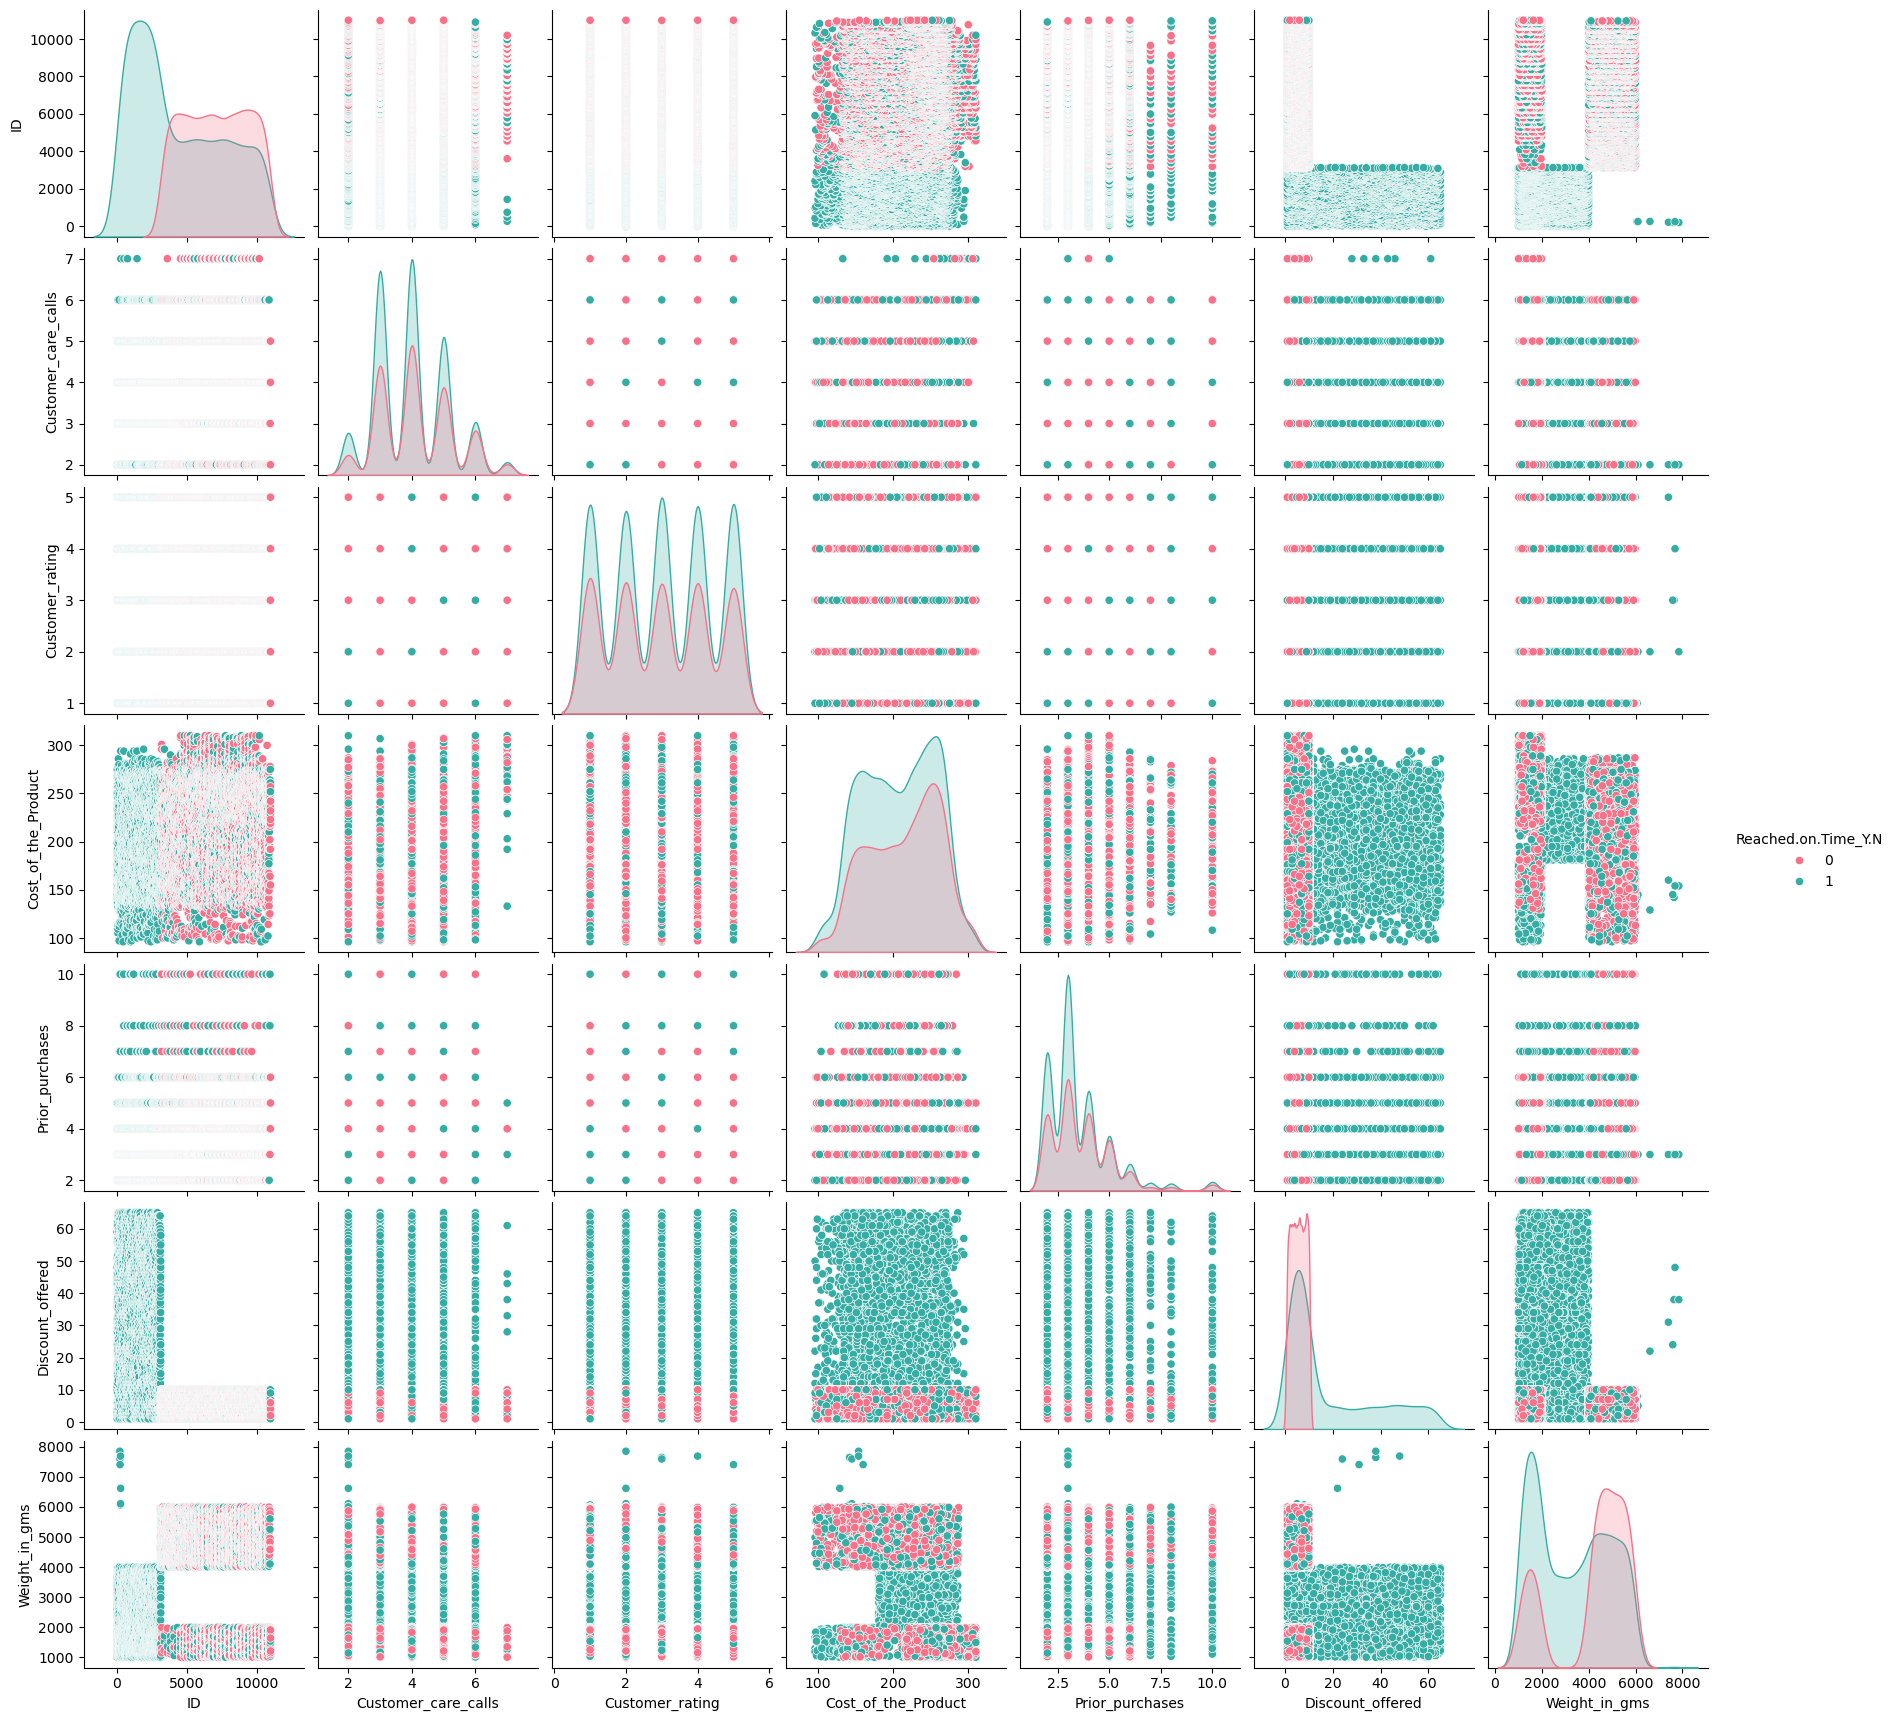

In [42]:
#A pairplot 
sns.pairplot(df, hue="Reached.on.Time_Y.N", diag_kind="kde", palette="husl")

plt.show()

#Discount Offered has highest classification power

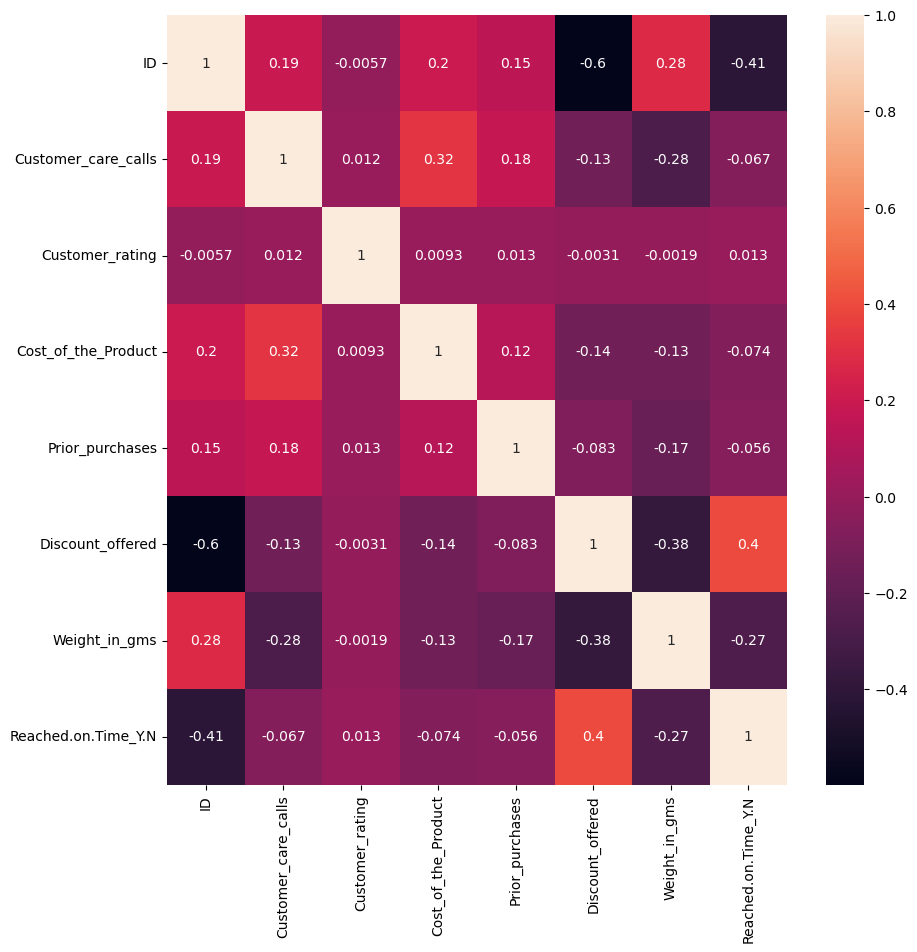

In [ ]:
#Correlation heatmap
numeric_df =  df.select_dtypes(include ='number')
fig = plt.figure(figsize=(10,10))
sns.heatmap(numeric_df.corr(),annot = True)
plt.show()

### One Hot Encoding  
 -  for our Gender, Warehouse and mode of transport data since they are categorical data

In [52]:
categorical = ['Warehouse_block', 'Mode_of_Shipment','Product_importance','Gender']
encoded = OneHotEncoder(sparse_output=False)
feature_array = encoded.fit_transform(df[categorical])
feature_labels = encoded.get_feature_names_out(categorical)

#A dataframme of the one hot encoded features
features = pd.DataFrame(feature_array,columns=feature_labels)
features.head()

,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [55]:
#Concat Data and Features and dropping all original categorical columns 
df =  pd.concat([df,features], axis=1)
df.drop(categorical,axis=1,inplace=True)

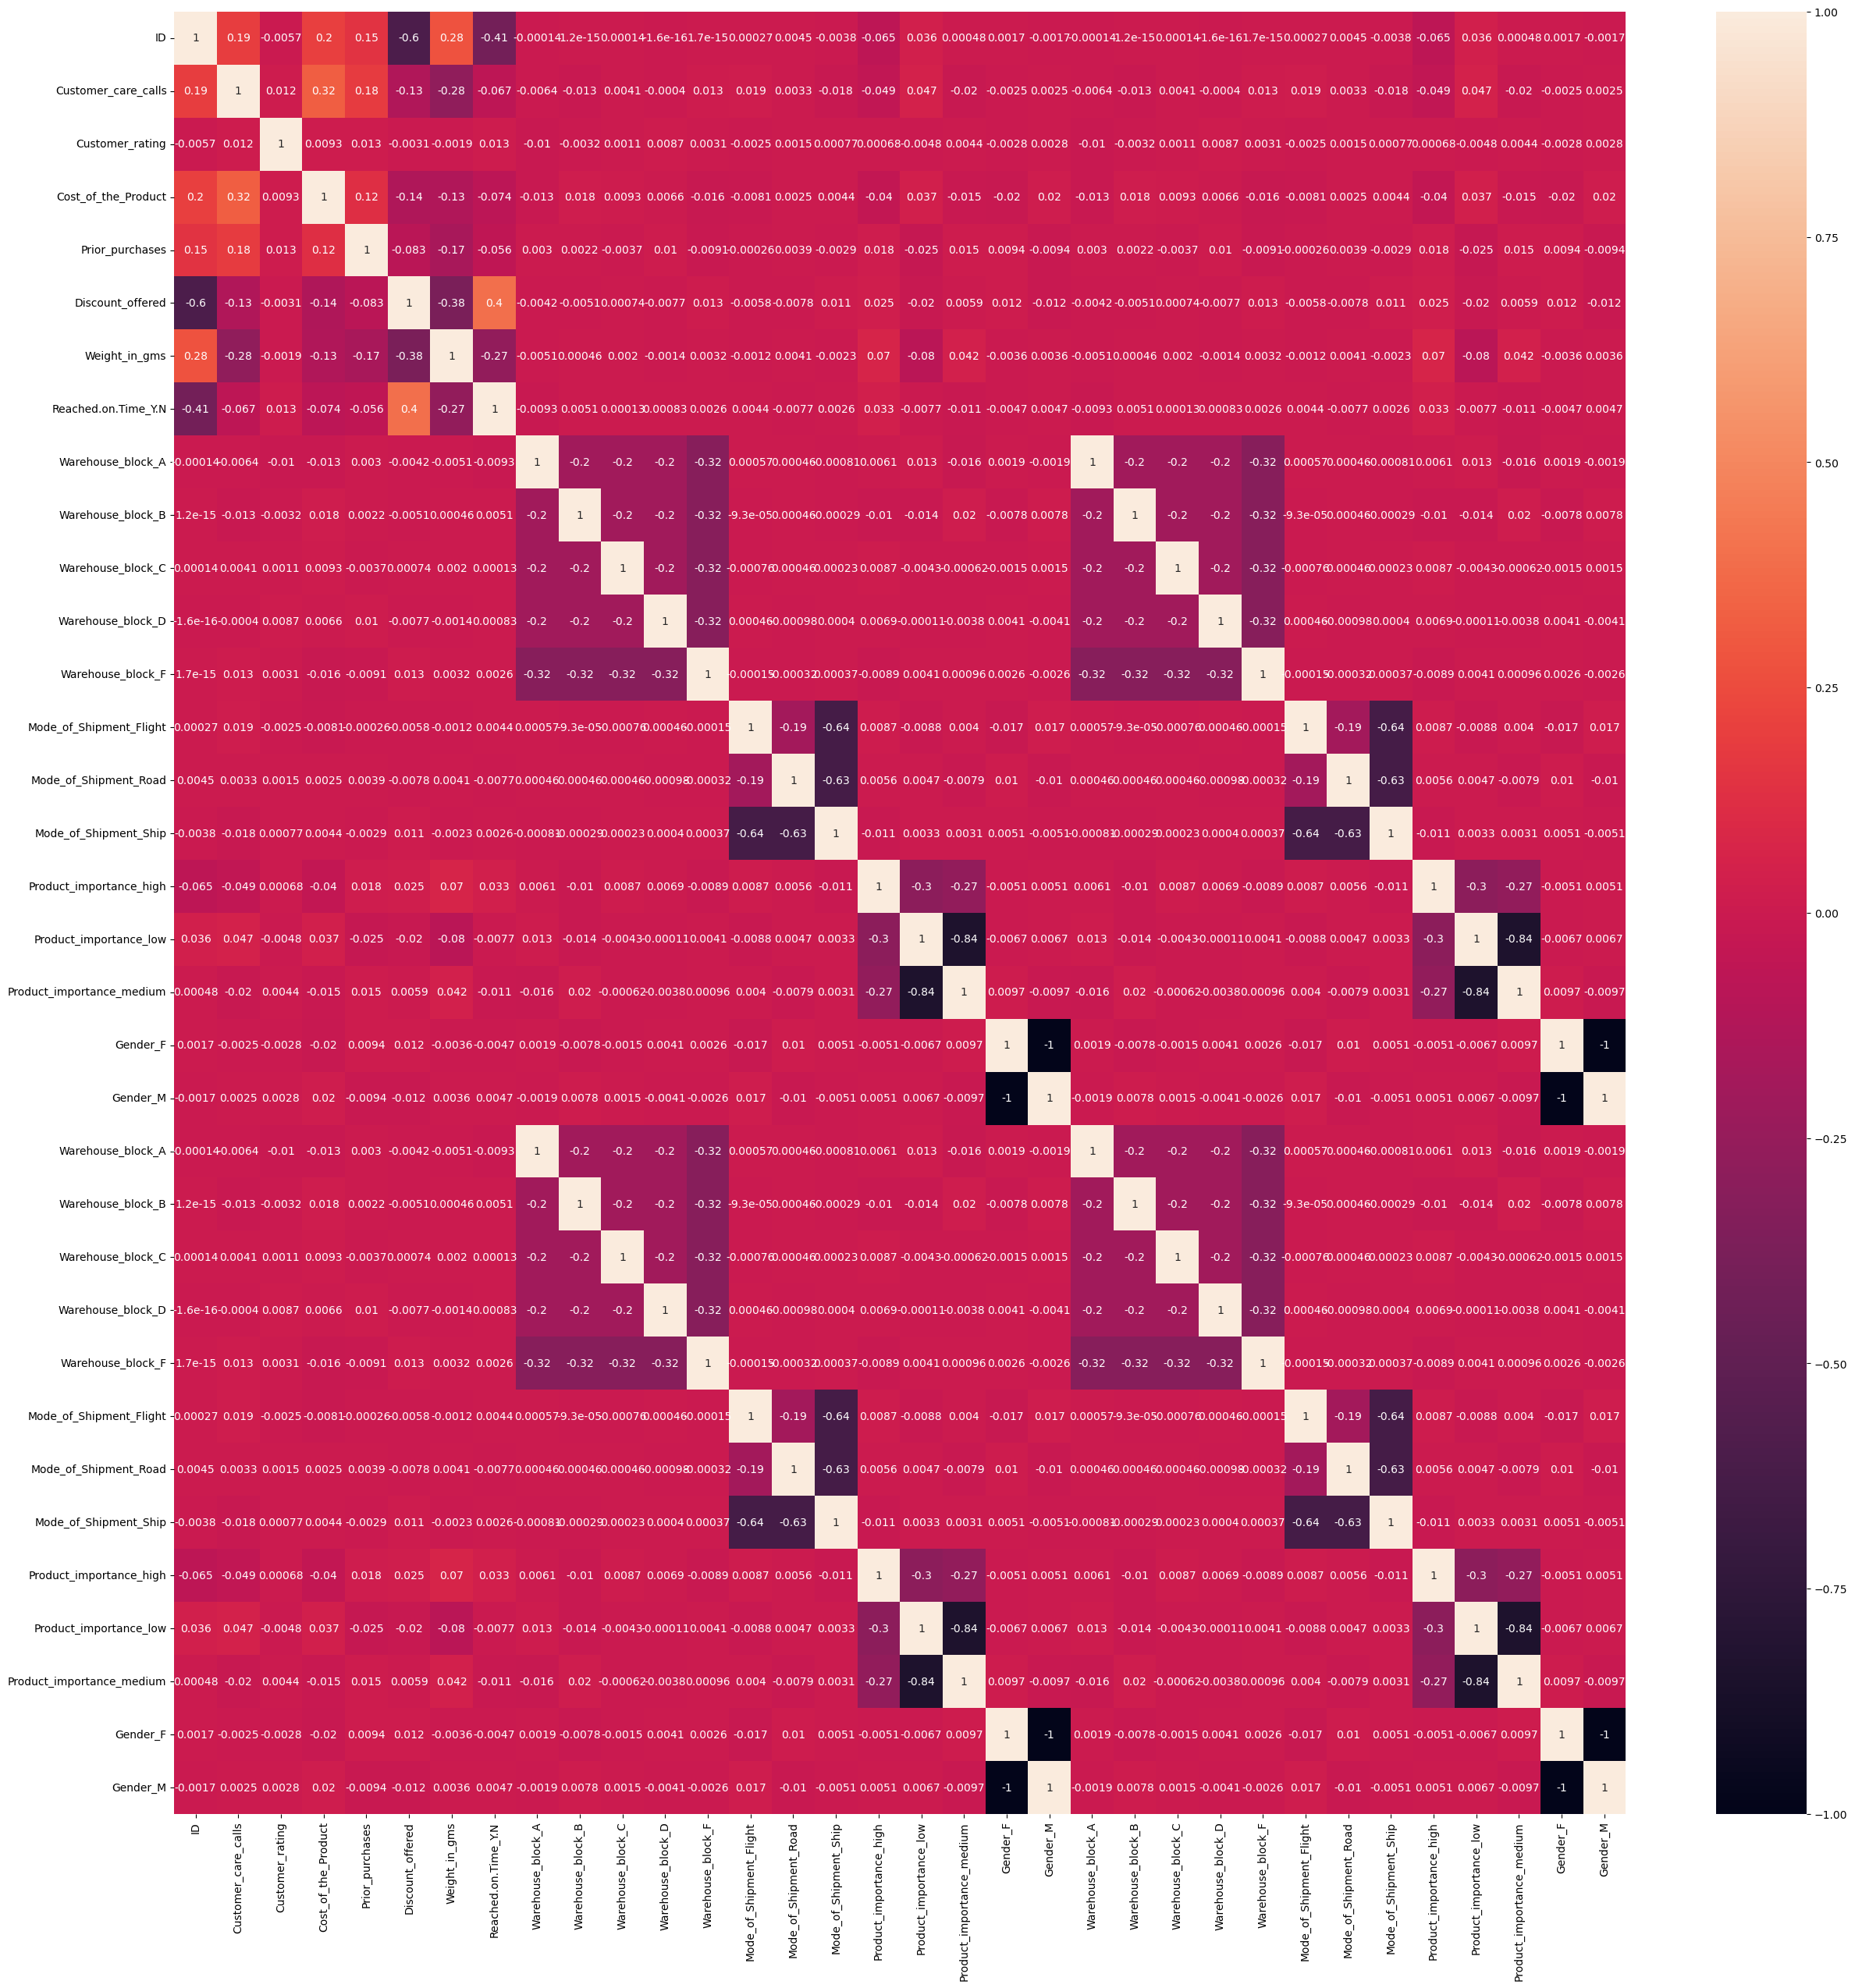

In [57]:
#Heatmap
fig = plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot = True)
plt.show()

#### Modelling

In [61]:
#Splitting dataset 
X = df.drop("Reached.on.Time_Y.N", axis = 1)
y = df["Reached.on.Time_Y.N"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

##### Logistic Regression 

In [74]:
testing = df.drop("Reached.on.Time_Y.N", axis=1).select_dtypes('number')
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_train_preds = clf.predict(X_train)
y_test_preds = clf.predict(X_test)
result = pd.DataFrame(clf.predict(testing), columns = ['pred'])

print(f'Accuracy test score : {round(accuracy_score(y_test, y_test_preds),3)}')
print(f'Recall score  test: {round(recall_score(y_test, y_test_preds),4)}')


Accuracy test score : 0.656
Recall score  test: 0.682


c:\Users\mulwa\.conda\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


the correct prediction made by the model on test set = 65.2%.Need to increase it 
Recall_score shows how our model identifies positive intances of the target class =68% need to increase it 